In [2]:
#현재 위치 확인
!pwd

/content


In [3]:
#ACGPN 모델 파일 다운로드
!git clone https://github.com/kairess/ACGPN.git

Cloning into 'ACGPN'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 165 (delta 21), reused 19 (delta 18), pack-reused 141
Receiving objects: 100% (165/165), 303.15 KiB | 15.96 MiB/s, done.
Resolving deltas: 100% (62/62), done.


In [4]:
#다운로드 받은 파일의 위치로 이동
%cd ACGPN

/content/ACGPN


dependencies 및 사전 파일 준비

In [5]:
!pip install -U --no-cache-dir gdown --pre -qq
!pip install ninja -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 6.2 MB/s eta 0:00:00


In [6]:
import gdown
import numpy as np
from PIL import Image
import IPython
import os
import sys
import time

from predict_pose import generate_pose_keypoints

In [7]:
#모델을 돌리기 위한 파일 준비
!mkdir Data_preprocessing/test_color
!mkdir Data_preprocessing/test_colormask
!mkdir Data_preprocessing/test_edge
!mkdir Data_preprocessing/test_img
!mkdir Data_preprocessing/test_label
!mkdir Data_preprocessing/test_mask
!mkdir Data_preprocessing/test_pose
!mkdir inputs
!mkdir inputs/img
!mkdir inputs/cloth

In [8]:
#현재 위치 확인
!pwd

/content/ACGPN


In [9]:
#옷 마스킹 모델 파일 다운로드
!git clone https://github.com/levindabhi/U-2-Net.git

Cloning into 'U-2-Net'...
remote: Enumerating objects: 822, done.
remote: Total 822 (delta 0), reused 0 (delta 0), pack-reused 822
Receiving objects: 100% (822/822), 30.72 MiB | 29.48 MiB/s, done.
Resolving deltas: 100% (379/379), done.


사전학습된 모델 다운로드

U-2-Net모델 (옷 마스크 추출 모델)

In [12]:
#U-2-Net 모델을 돌릴 때 필요한 파일 준비를 위해 해당 모델 파일로 이동
%cd U-2-Net

#U-2-Net 모델에 필요한 파일 생성
!mkdir saved_models
!mkdir saved_models/u2net
!mkdir saved_models/u2netp

#사전 학습된 U-2-Net 모델 다운로드
!gdown 1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy -O saved_models/u2netp/u2netp.pth
!gdown 1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ -O saved_models/u2net/u2net.pth

import u2net_load
import u2net_run

#로드하려면 쿠다 필요 (위치 확인용)
u2net = u2net_load.model(model_name='u2netp')

#U-2-Net 모델을 위한 파일 준비가 끝나면 부모 파일로 이동
%cd ..

[Errno 2] No such file or directory: 'U-2-Net'
/content/ACGPN/U-2-Net
mkdir: cannot create directory ‘saved_models’: File exists
mkdir: cannot create directory ‘saved_models/u2net’: File exists
mkdir: cannot create directory ‘saved_models/u2netp’: File exists
Downloading...
From: https://drive.google.com/uc?id=1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy
To: /content/ACGPN/U-2-Net/saved_models/u2netp/u2netp.pth
100% 4.68M/4.68M [00:00<00:00, 160MB/s]
Downloading...
From (uriginal): https://drive.google.com/uc?id=1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ
From (redirected): https://drive.google.com/uc?id=1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ&confirm=t&uuid=e80b68b1-d1b6-4dc0-b1e8-9cecc70fc03b
To: /content/ACGPN/U-2-Net/saved_models/u2net/u2net.pth
100% 176M/176M [00:00<00:00, 202MB/s]
...load U2NEP---4.7 MB
/content/ACGPN


데이터셋 준비

옷 마스크 추출 테스트

In [13]:
#옷 데이터셋이 올바른 위치에 있는지 확인
sorted(os.listdir('inputs/cloth'))

['000066_1.jpg']

Generating mask for: cloth_1681217518.png
Saving output at Data_preprocessing/test_edge/cloth_1681217518.png


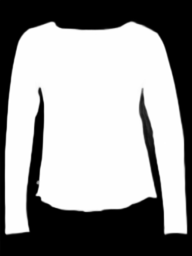

In [14]:
#전처리 할 옷 데이터 이름을 시간으로 지정
cloth_name = f'cloth_{int(time.time())}.png'

#전처리 할 옷 데이터의 파일 위치 확인
cloth_path = os.path.join('inputs/cloth', sorted(os.listdir('inputs/cloth'))[0])

#이미지 할당
cloth = Image.open(cloth_path)

#이미지 크기 변환 및 RGB 색공간으로 변환
cloth = cloth.resize((192, 256), Image.BICUBIC).convert('RGB')

#전처리를 위해 옷 이미지 파일을 해당 파일 위치에 지정해준 옷 데이터 이름으로 저장
cloth.save(os.path.join('Data_preprocessing/test_color', cloth_name))

#전처리를 위해 U-2-Net모델을 지정한 파일 위치에서 데이터셋을 가저와서 돌리고, 지정한 위치에 전처리 된 옷 이미지 파일을 저장
u2net_run.infer(u2net, 'Data_preprocessing/test_color', 'Data_preprocessing/test_edge')

#결과 확인을 위해 전처리 된 옷 이미지 파일을 열어봄
Image.open(f'Data_preprocessing/test_edge/{cloth_name}')